# Exploring numerical variables

## Histograms

## Setup

In [120]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats # to compute the mode

sns.set_style("whitegrid", {'axes.grid' : False})

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"

colors_blue = [blue, blue_light]

## Import data

In [3]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loan50.csv"

df = pd.read_csv(ROOT + DATA)
df["interest_rate"] = df["interest_rate"].astype("int64")

In [125]:
mode_ir = stats.mode(df["interest_rate"])
median_ir = df.interest_rate.median()
mean_ir = df.interest_rate.mean() 

print(mode_ir[0], median_ir, mean_ir)

df["interest_rate"].describe()

[9] 9.0 11.04


count    50.000000
mean     11.040000
std       5.138729
min       5.000000
25%       7.000000
50%       9.000000
75%      13.500000
max      26.000000
Name: interest_rate, dtype: float64

## Histogram

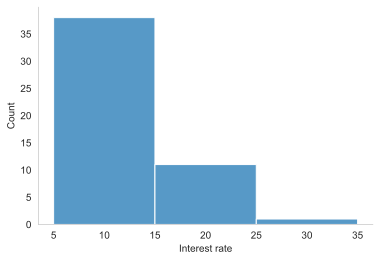

In [9]:
sns.histplot(data=df,  x="interest_rate", palette=colors_blue, binwidth=10)

plt.xlabel("Interest rate")
plt.ylabel("Count")

sns.despine();

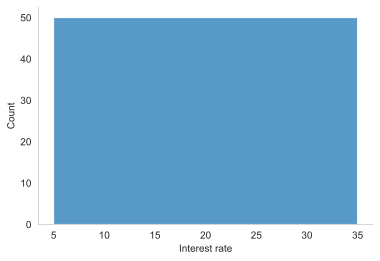

In [10]:
# Histogram with bin width of 30
sns.histplot(data=df,  x="interest_rate", palette=colors_blue, binwidth=30)

plt.xlabel("Interest rate")
plt.ylabel("Count")

sns.despine();

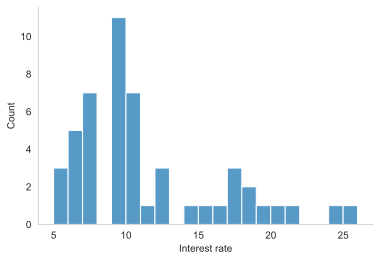

In [11]:
# Histogram with bin width of 1
sns.histplot(data=df,  x="interest_rate", palette=colors_blue, binwidth=1)

plt.xlabel("Interest rate")
plt.ylabel("Count")
sns.despine();

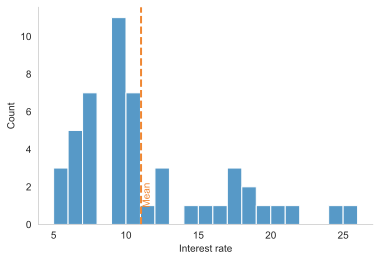

In [118]:
# Histogram with bin width of 1 and mean

mean_hist = df.interest_rate.mean()

sns.histplot(data=df,  x="interest_rate", palette=colors_blue, binwidth=1)

plt.axvline(mean_hist, linewidth=2, linestyle="--", color=orange);
plt.text(mean_hist+0.1, 1,  "Mean", rotation=90, color=orange);

plt.xlabel("Interest rate")
plt.ylabel("Count")
sns.despine();

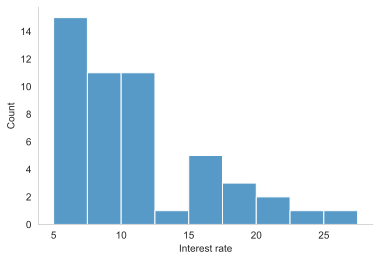

In [113]:
# Histogram with bin width 2.5

sns.histplot(data=df,  x="interest_rate", palette=colors_blue, binwidth=2.5)

plt.xlabel("Interest rate")
plt.ylabel("Count")

sns.despine();

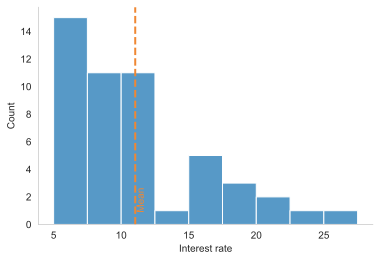

In [119]:
# Histogram with bin width 2.5 and mean
sns.histplot(data=df,  x="interest_rate", palette=colors_blue, binwidth=2.5)

plt.axvline(mean_hist, linewidth=2, linestyle="--", color=orange);
plt.text(mean_hist+0.1, 1,  "Mean", rotation=90, color=orange);

plt.xlabel("Interest rate")
plt.ylabel("Count")

sns.despine();

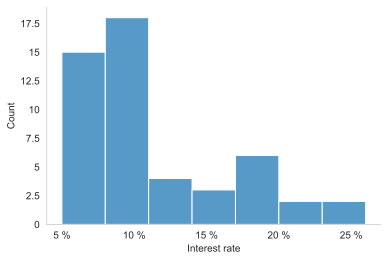

In [112]:
# Histogram with additional styling
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
sns.histplot(data=df,  x= "interest_rate", palette=colors_blue)

ax.xaxis.set_major_formatter(ticker.EngFormatter('%'))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel("Interest rate")
plt.ylabel("Count")
sns.despine()

plt.show();

In [20]:
# Create data with normal distribution
import numpy
import random

random.seed(123)

mean, sd = 11, 2
interest_rates_normal = numpy.random.normal(mean, sd, 1000)

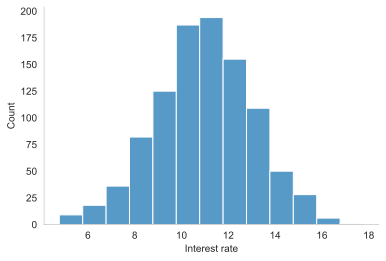

In [21]:
# Histogram 
sns.histplot(interest_rates_normal, palette=colors_blue, binwidth=1.0)

plt.xlabel("Interest rate")
plt.ylabel("Count")

sns.despine();

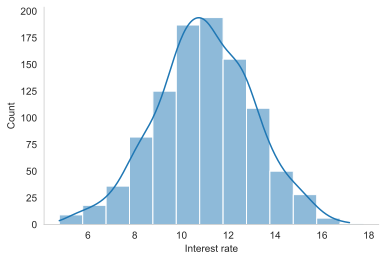

In [22]:
# Histogram with kde
sns.histplot(interest_rates_normal, palette=colors_blue, binwidth=1.0, kde=True)

plt.xlabel("Interest rate")
plt.ylabel("Count")

sns.despine();

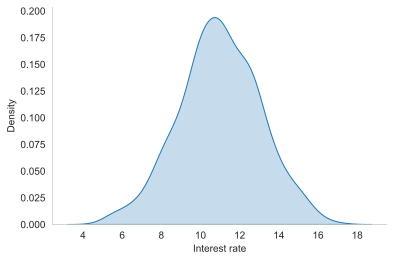

In [104]:
 # Kernel density estimate (KDE) plot
 sns.kdeplot(interest_rates_normal,  fill=blue_light)

plt.xlabel("Interest rate")
plt.ylabel("Density")

sns.despine();

In [70]:
mean = interest_rates_normal.mean().round(2)
variance = interest_rates_normal.var().round(2)
sd = interest_rates_normal.std().round(2)

print(" Mean:", mean,"\n","Variance:", variance,"\n", 
      "Standard deviation", sd)

 Mean: 10.98 
 Variance: 4.29 
 Standard deviation 2.07


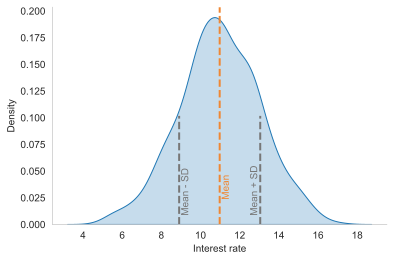

In [103]:
# Kernel density estimate (KDE) plot

sns.kdeplot(interest_rates_normal, fill=blue_light)

plt.xlabel("Interest rate")
plt.ylabel("Density")

sns.despine();

plt.axvline(mean, linewidth=2, linestyle="--", color=orange);
plt.text(mean+0.1, 0.025,  "Mean", rotation=90, color=orange);
plt.axvline(mean-sd, 0, 0.5, linestyle="--", linewidth=2, color=grey_dark);
plt.text(mean-sd+0.1, 0.01,'Mean - SD', rotation=90, color=grey_dark);
plt.axvline(mean+sd, 0, .5,linestyle="--", linewidth=2, color=grey_dark);
plt.text(mean+sd-0.52, 0.01,'Mean + SD', rotation=90, color=grey_dark);